# Plot Scatter plot

This notebook will help you generate a scatterplot in Python. **Scatterplots** help us visually inspect the relationship between two continuous variables. This notebook could be used to plot your **resistance** vs. **time constant** observations from the RC circuit lab, for example.

After plotting, we'll also show how to generate a linear regression line for your data. **Linear regression** is a common tool to look for a linear relationship between two variables.

![](https://imgs.xkcd.com/comics/linear_regression.png)

<br>
<div align="center"><i>Comic: XKCD https://xkcd.com/1725/<i></div>

<mark>If you're new to Jupyter Notebooks and/or Python, please be sure to work through the Introduction notebook before this one.</mark>
    
<hr>

## Setup

At the start of almost every coding notebook, we'll import the packages we need. To plot our scatter plot, we just need package: `matplotlib.pyplot`. 

> **Task**: Import the `matplotlib.pyplot` package as `plt`, just as you did in the introduction notebook.

In [4]:
# Import necessary packages here


# These lines are additional configuration steps for matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Define values to plot
With matplotlib imported, we can now use the scatter function by calling `plt.scatter()`. However, we need to define what to plot first. One straightforward way to think about this is to define an x variable and a y variable. Below, there are **lists** of values (defined in brackets `[ ]`) assigned to `x` and `y`. Replace these with your own values, depending on what you'd like to plot on the x and y axis.

**Note**: Remember that in a scatterplot, each dot has both an x and a y value. Therefore, these lists should be the same length. The coordinate for each point will be the values at the same **index** in `x` and `y`. For example, the coordinate for the very first point will be `x[0],y[0]`.

In [7]:
# Replace your scatterplot values here
x = [1,2,3,4,5,6]
y = [4,5,6,7,8,9]

## Plot & label
We can now plot our values using the code below. Remember that you can add axis labels using `plt.xlabel()`. If you need a reminder for how to do this, refer to the Introduction notebook.

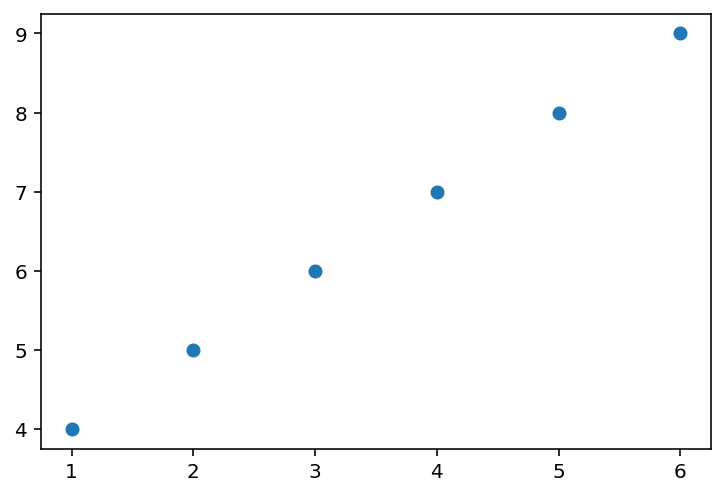

In [8]:
plt.scatter(x,y)

# Add labels here

plt.show()

## Add a linear regression line (*optional*)
If we have an a priori hypothesis about the relationship between our variables, or would like to predict additional data points, we can attempt to fit a linear regression line to our data. To do so, we will do the following:

1. Import two more packages: `numpy` (numerical python; the convention is to import this as `np`) and the `stats` package from `scipy` (scientific python).
2. Convert our x and y lists into arrays, so that we can perform math on them.
3. Perform a linear regression using `linregress()` from the `stats` library. The `linregress()` function calculates a **linear least-squares regression** for two sets of measurements. It returns several parameters, including the slope (`slope`), the y-intercept (`intercept`), the correlation coefficient (`r_value`), the two-tailed p-value (`p_value`), and the standard error of the estimate (`std_err`).
4. Plot the regression line, using the computed slope and intercept to construct it (mx+b).
5. Plot the original data points.

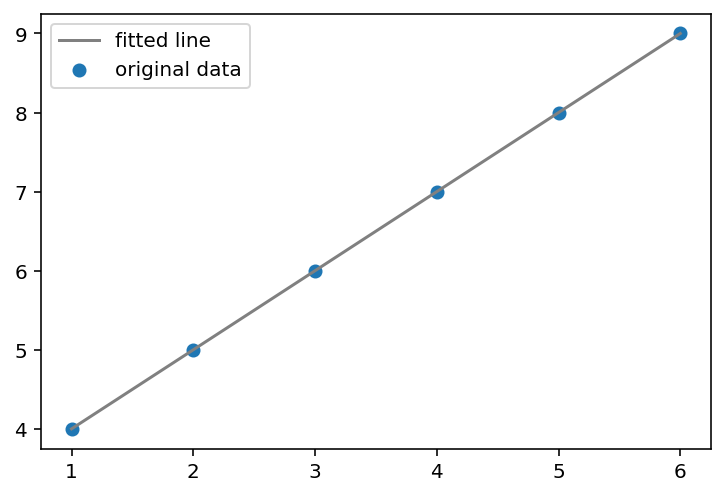

In [9]:
# 1 - Import additional packages
import numpy as np
from scipy import stats

# 2 - Convert x and y to numpy arrays
x_array = np.array(x)
y_array = np.array(y)

# 3 - Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_array,y_array)

# 4 - Plot a regression line, using the slope & intercept
plt.plot(x_array, slope*x_array+intercept, color='gray',label='fitted line')

# 5 - Plot our original data points and show
plt.scatter(x_array,y_array,label='original data')
plt.legend()
plt.show()

It is also a good idea to print the statistics from our linear regression above. These are contained in `r_value` and `p_value`:
* `r_value`: This is the correlation coefficient, also known as the R-value. It measures the strength and direction of the linear relationship between the two variables. It ranges from -1 to 1, where a value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.
* `p_value`: This is the two-tailed p-value. A small p-value (typically less than 0.05) indicates that the correlation is statistically significant and that there is a low probability that the observed correlation occurred by chance.

It can also be helpful to look at `std_err`: the standard error of the estimate. It represents the standard deviation of the residuals (the differences between the observed y values and the predicted y values). A small standard error indicates that the fitted line is a good fit for the data.

> **Task**: Print your values below.

Finally, sometimes it is useful to have the fitted line equation. We can create a text string by adding variables together, like so:
```
text_string = 'this is ' + variable
```
*However*, Python will not allow us to add anything that isn't a string -- we have to convert it to a string first using the `str()` function. To do so, we could write:
```
text_string = 'this is ' + str(variable)
```
>**Task**: Below, create a text string for the fitted line equation, in the form of Y = MX + B, where M is your slope, and B is your intercept. In other words, it should look something like this:
```
Y = 1.0X + 3.0
```

Assign the fitted line equation to a variable called `label`.

In [ ]:
label = ...

## Add your regression line to the plot *(optional)*

It is useful to report the fitted line equation either on the plot itself or in the figure caption. The code below will show you how to add text using `plt.text()`. This function takes three inputs: the x,y location of the text as well as the string itself (s). If you'd like, you can integrate this into your code above.

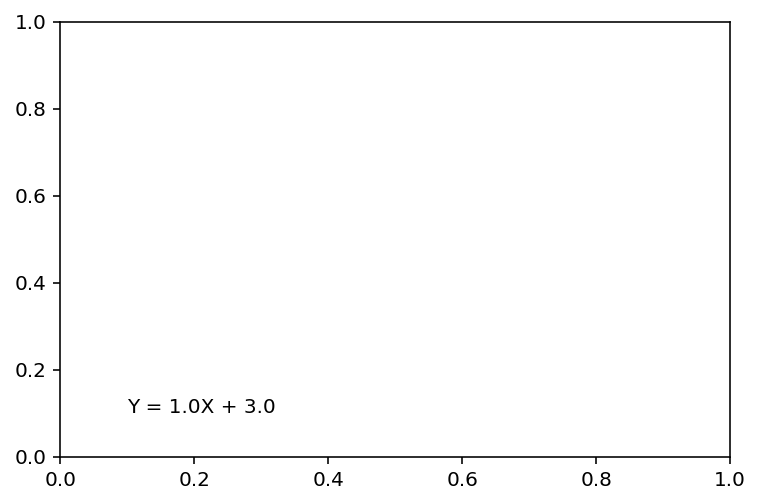

In [17]:
plt.figure()
plt.text(x = 0.1, y = 0.1, s = label)
plt.show()

## Fit a curved line
Alternatively, we can perform a Least Squares Regression to fit to a Curve. To do so, we'll use `scipy.optimize.curve_fit()`. [[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)]

0.9239011751642454
0.4739203931704783
0.278745874411597 <-- This is your Rheobase in the hyperbolic function
2.749230408204977 <-- This is your Chronaxie in the hyperbolic function
Y=0.28+0.28*2.75/x


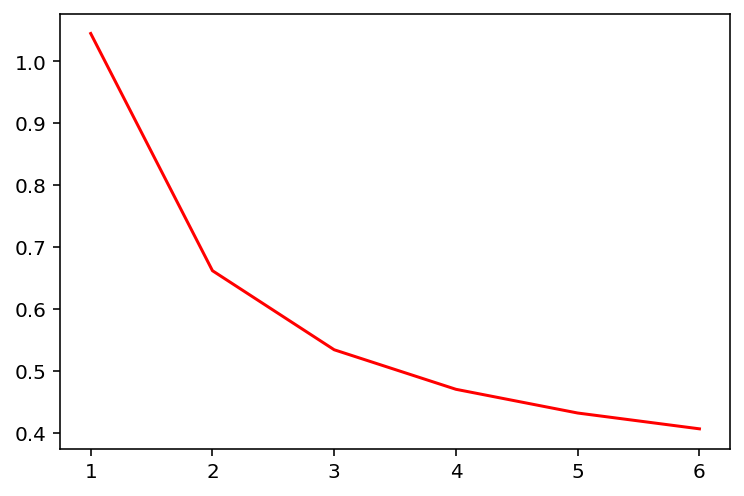

In [22]:
# 1 - Import packages
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

# 2 - Convert x and y to numpy arrays
x_array = np.array(x)
y_array = np.array(y)

# 3 - Define a curve function
def func(x, a, b):
    #return (a*x)+b #linear function
    #return np.exp(np.log(a)+(x*np.log(b))) #exponential function y=a*(b^x)
    #return np.exp(np.log(a)+(b*np.log(x))) #power function y=a*(x^b)
    return a+((a*b)/x) #hyperbolic function

# 4 - Fit the curve!
popt, pcov = curve_fit(func,x_array,y_array)

# 5 - Plot a regression line, using the slope & intercept
plt.plot(x_array, func(x_array, *popt), 'r-')

#To get the r squared and S_value use this code
residuals = y_array- func(x_array, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_array-np.mean(y_array))**2)
r_squared = 1 - (ss_res / ss_tot)

perr = np.sqrt(np.diag(pcov))
S_value=(perr[0]+perr[1])/2
print(r_squared)
print(S_value)

#To get the equation for the curve (example for Hyperbolic function)
a = popt[0]
b = popt[1]

#label = 'Y=' + str(round(a,2)) + "*x^" + str(round(b,2)) #Power function
label = 'Y=' + str(round(a,2)) + '+' + str(round(a,2)) + '*' + str(round(b,2))  + '/x' 
print(str(a) + ' <-- This is your Rheobase in the hyperbolic function')
print(str(b) + ' <-- This is your Chronaxie in the hyperbolic function')
print(label)

<hr>

## Additional notes & resources

Another way to generate a scatterplot with a linear regression line is the [seaborn regplot function](https://seaborn.pydata.org/generated/seaborn.regplot.html)!